## Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2 \;\;\;\;\;\;\;(1)$$

In [16]:
import numpy as np

### Adam

In [17]:
def df_w(w):
    """
    Thực hiện tính gradient của dw1 và dw2
    Arguments:
    W -- np.array [w1, w2]
    Returns:
    dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    """
    #################### YOUR CODE HERE ####################


    dW = np.array([0.2*w[0] , 4*w[1]])
    ########################################################

    return dW

In [21]:
def Adam(W, dW, lr, V, S, beta1, beta2, t):
    """
    Thực hiện thuật tóan Adam để update w1 và w2
    Arguments:
    W -- np.array: [w1, w2]
    dW -- np.array: [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    lr -- float: learning rate
    V -- np.array: [v1, v2] Exponentially weighted averages gradients
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients
    beta1 -- float: hệ số long-range average cho V
    beta2 -- float: hệ số long-range average cho S
    t -- int: lần thứ t update (bắt đầu bằng 1)
    Returns:
    W -- np.array: [w1, w2] w1 và w2 sau khi đã update
    V -- np.array: [v1, v2] Exponentially weighted averages gradients sau khi đã cập nhật
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients sau khi đã cập nhật
    """
    epsilon = 1e-6
    #################### YOUR CODE HERE ####################
    V = beta1 * V + (1 - beta1) * dW
    
    S = beta2 * S + (1 - beta2) * (dW ** 2)
    
    V_hat = V / (1 - beta1 ** t)
    S_hat = S / (1 - beta2 ** t)
    
    W = W - lr * V_hat / (np.sqrt(S_hat) + epsilon)
    
    ########################################################
    return W, V, S

In [26]:
def train_p1(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function (1) dựa vào thuật toán
    được truyền vào từ optimizer
    Arguments:
    optimize : function thực hiện thuật toán optimization cụ thể
    lr -- float: learning rate
    epochs -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns:
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch (mỗi lần cập nhật)
    """
    # initial
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]
    #################### YOUR CODE HERE ####################
    # Tạo vòng lặp theo số lần epochs
    # tìm gradient dW gồm dw1 và dw2
    # dùng thuật toán optimization cập nhật w1, w2, s1, s2, v1, v2
    # append cặp [w1, w2] vào list results
    # các bạn lưu ý mỗi lần lặp nhớ lấy t (lần thứ t lặp) và t bất đầu bằng 1
    for i in range(1,epochs+1):
        dW = df_w(W)
        W,V,S = optimizer(W, dW, lr, V, S, 0.9, 0.999, i)
        results.append(W)
    ########################################################
    return results

In [29]:
results = train_p1(Adam, lr=0.2, epochs=30)
results

[array([-5., -2.], dtype=float32),
 array([-4.8000002 , -1.80000002]),
 array([-4.60025478, -1.60082451]),
 array([-4.40094848, -1.40317262]),
 array([-4.20227764, -1.20787822]),
 array([-4.00445033, -1.01592745]),
 array([-3.80768638, -0.82847307]),
 array([-3.61221732, -0.64684159]),
 array([-3.41828623, -0.47252765]),
 array([-3.22614739, -0.30716934]),
 array([-3.03606592, -0.15249855]),
 array([-2.84831706, -0.01026326]),
 array([-2.66318543,  0.11787552]),
 array([-2.480964  ,  0.23046161]),
 array([-2.30195279,  0.3263587 ]),
 array([-2.12645742,  0.40484195]),
 array([-1.95478732,  0.46564961]),
 array([-1.7872537 ,  0.50898799]),
 array([-1.62416726,  0.53549442]),
 array([-1.46583566,  0.54617144]),
 array([-1.31256067,  0.54230812]),
 array([-1.16463526,  0.52540206]),
 array([-1.02234036,  0.4970906 ]),
 array([-0.88594163,  0.4590951 ]),
 array([-0.75568617,  0.41317781]),
 array([-0.63179919,  0.3611089 ]),
 array([-0.51448089,  0.30464048]),
 array([-0.40390346,  0.24548

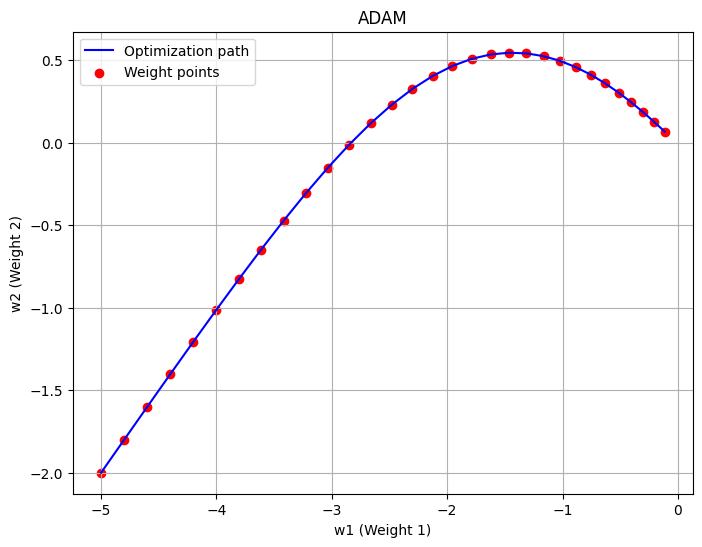

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimization_path(results):
    """
    Plot the optimization path showing how the weights change during training.
    
    Arguments:
    results -- list: A list of weight pairs [w1, w2] from the optimizer
    """
    # Extract w1 and w2 values
    w1_values = [res[0] for res in results]
    w2_values = [res[1] for res in results]

    # Plot the path of optimization with lines and scatter points for the circles
    plt.figure(figsize=(8, 6))
    
    # Plot the line connecting the points
    plt.plot(w1_values, w2_values, linestyle='-', color='b', label="Optimization path")
    
    # Plot circles at each point 
    plt.scatter(w1_values, w2_values, color='r', marker='o', label="Weight points")
    
    # Add labels and title
    plt.xlabel('w1 (Weight 1)')
    plt.ylabel('w2 (Weight 2)')
    plt.title('ADAM')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

# Plot the optimization patha
plot_optimization_path(results)